# Étude à réaliser sur MNIST

In [3]:
from principal_RBM_MNIST import *
from principal_DNN_MNIST import *

In [4]:
import os
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
import numpy as np

def download_mnist():
    if os.path.exists('mnist_784.npz'):
        return
    mnist = fetch_openml('mnist_784')
    X = mnist['data'].values
    X[X < 127] = 0 
    X[X >= 127] = 1
    y = mnist['target']
    y = LabelBinarizer().fit_transform(y)

    np.savez('mnist_784.npz', X=X, y=y)

def get_mnist(train_size, test_size):
    download_mnist()
    with np.load('mnist_784.npz') as data:
        X, y = data['X'], data['y']

    X_train, X_test = X[:train_size], X[train_size:train_size+test_size]
    y_train, y_test = y[:train_size], y[train_size:train_size+test_size]

    return X_train, X_test, y_train, y_test


## PROGRAMME

In [ ]:
# GET THE DATA READY
X_train, X_test, y_train, y_test = get_mnist(50000,20000)
# Number of epoch for pretraining
num_epochs_pretraining= 100
# Number of epoch for tuning
num_epochs_training = 200
# Learning rate
learning_rate=0.1
# Batch size
batch_size = 100
# Number of features
p = 28*28
# Number of classes 
nbr_classes = y_train.shape[1]

In [ ]:
X_train.shape, X_test.shape

In [ ]:
hidden_units = [200, 200]

dnn = init_DNN(p, hidden_units, nbr_classes)
print("Pretraining ================================")
dnn_pretrain = pretrain_DNN(dnn, X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
print("Fine Tuning ===================================")
dnn_fine_tune, loss = retropropagation(dnn, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train, display=True)

In [ ]:
# Output probability of random images 
random_samples = np.random.randint(0, len(X_test), size=9)
output_proba = entree_sortie_reseau(dnn_fine_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

In [ ]:
# Output probability of random images 
random_samples = np.random.randint(0, len(X_test), size=9)
output_proba = entree_sortie_reseau(dnn_fine_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

## TAUX D'ERREUR EN FONCTION DU NOMBRE DE COUCHES

In [7]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=10000, test_size=5000)

# Set number of epochs for pretraining and training
num_epochs_pretraining = 100
num_epochs_training = 200

# Set learning rate
learning_rate = 0.1

# Set batch size
batch_size = 100

# Set input dimension
input_dim = 28*28

# Set number of classes
num_classes = y_train.shape[1]

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (200, 200, 200), (200, 200, 200, 200)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

hidden_units : (200, 200)


Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Retropagation model random =====================================
Retropagation model pretrain =====================================
Test model pretrain =====================================
Test loss: 0.22104481134755002, Acc. %: 93.52000000000001%
Test model random =====================================
Test loss: 0.2870943752884812, Acc. %: 91.66%
hidden_units : (200, 200, 200)


Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Retropagation model random =====================================
Retropagation model pretrain =====================================
Test model pretrain =====================================
Test loss: 0.2009082402171824, Acc. %: 94.14%
Test model random =====================================
Test loss: 0.2751832063840022, Acc. %: 91.96%
hidden_units : (200, 200, 200, 200)


Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Training RMB:   0%|          | 0/50 [00:00<?, ?it/s]

Retropagation model random =====================================
Retropagation model pretrain =====================================
Test model pretrain =====================================
Test loss: 0.1891755777829214, Acc. %: 94.5%
Test model random =====================================
Test loss: 0.2848398360939241, Acc. %: 91.86%


In [ ]:
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de neurones")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


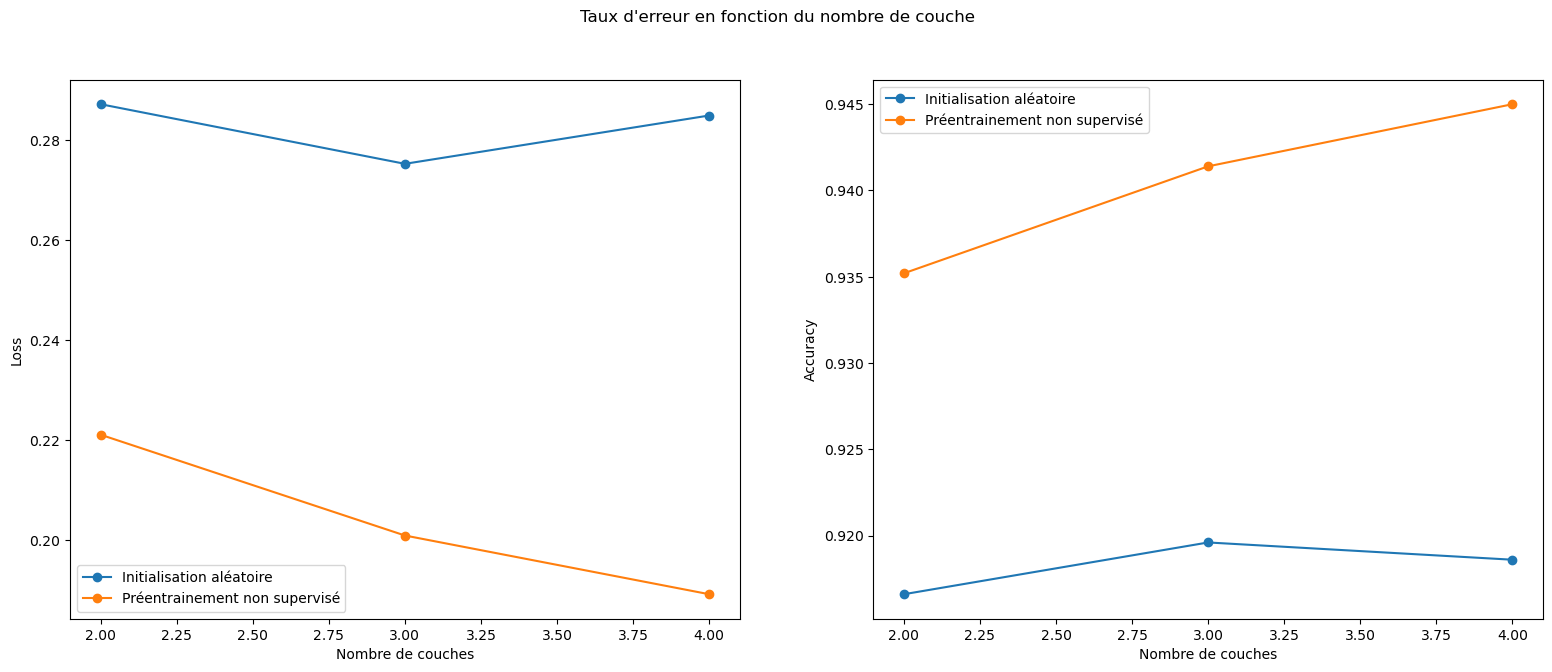

In [25]:
X_range = [len(x) for x in hidden_layer_units]

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de couche  ")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de couches")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de couches")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE NEURONES

In [ ]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=50000, test_size=20000)

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (300, 300), (400, 400), (500, 500), (600, 600), (700, 700)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []


# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

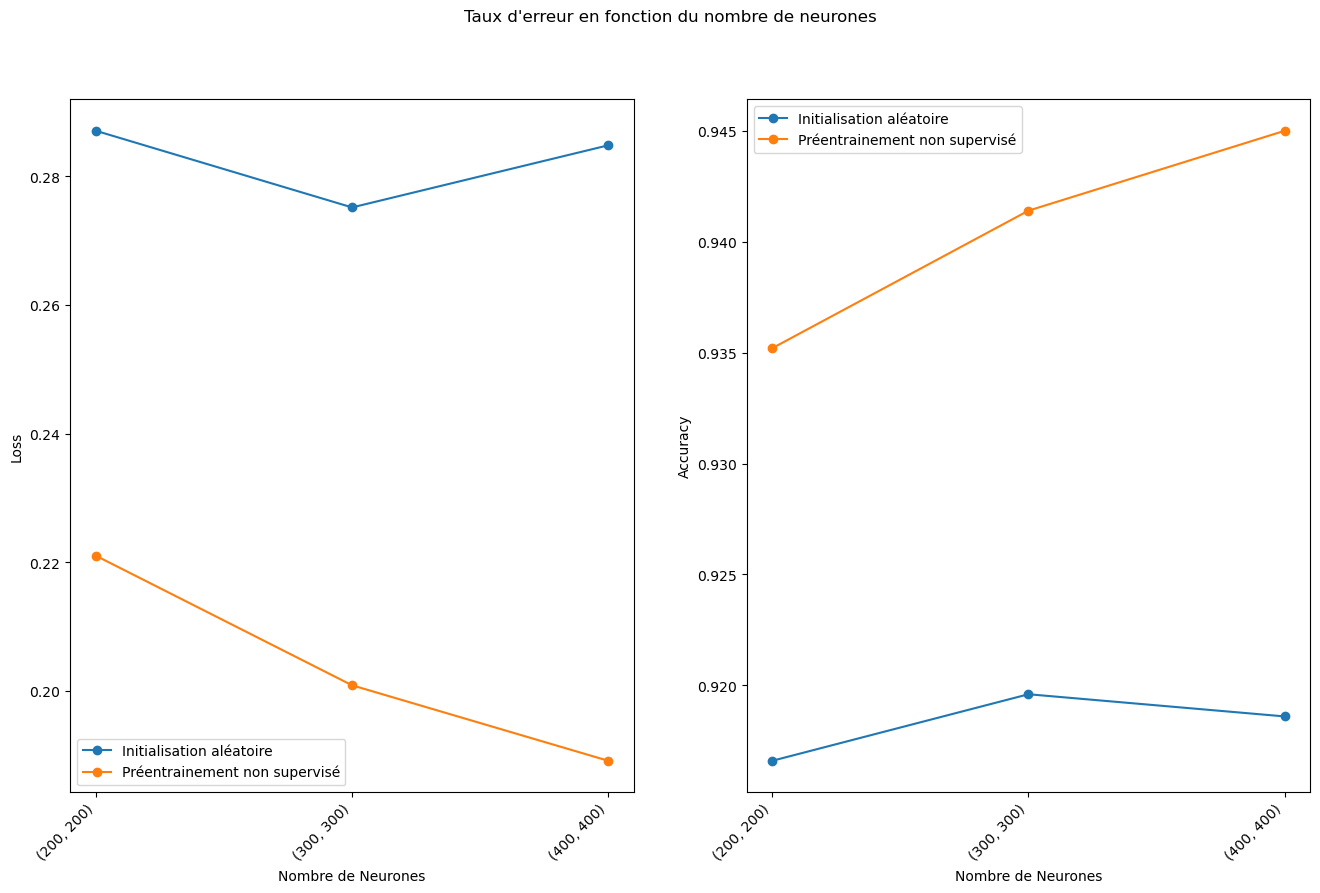

In [29]:
# Plot the result
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de neurones")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE DONNEES D'APPRENTISSAGE

In [ ]:
# Initialize variables
hidden_layers_units = (200, 200)
number_of_examples = [1000, 3000, 5000, 7000, 10000, 30000, 60000]
# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Train DNN for different number of examples
for number in number_of_examples:
    print(f"number of examples : {number}")
    # Load MNIST digits data
    X_train, X_test, y_train, y_test  = get_mnist(train_size=number, test_size=10000)
    
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

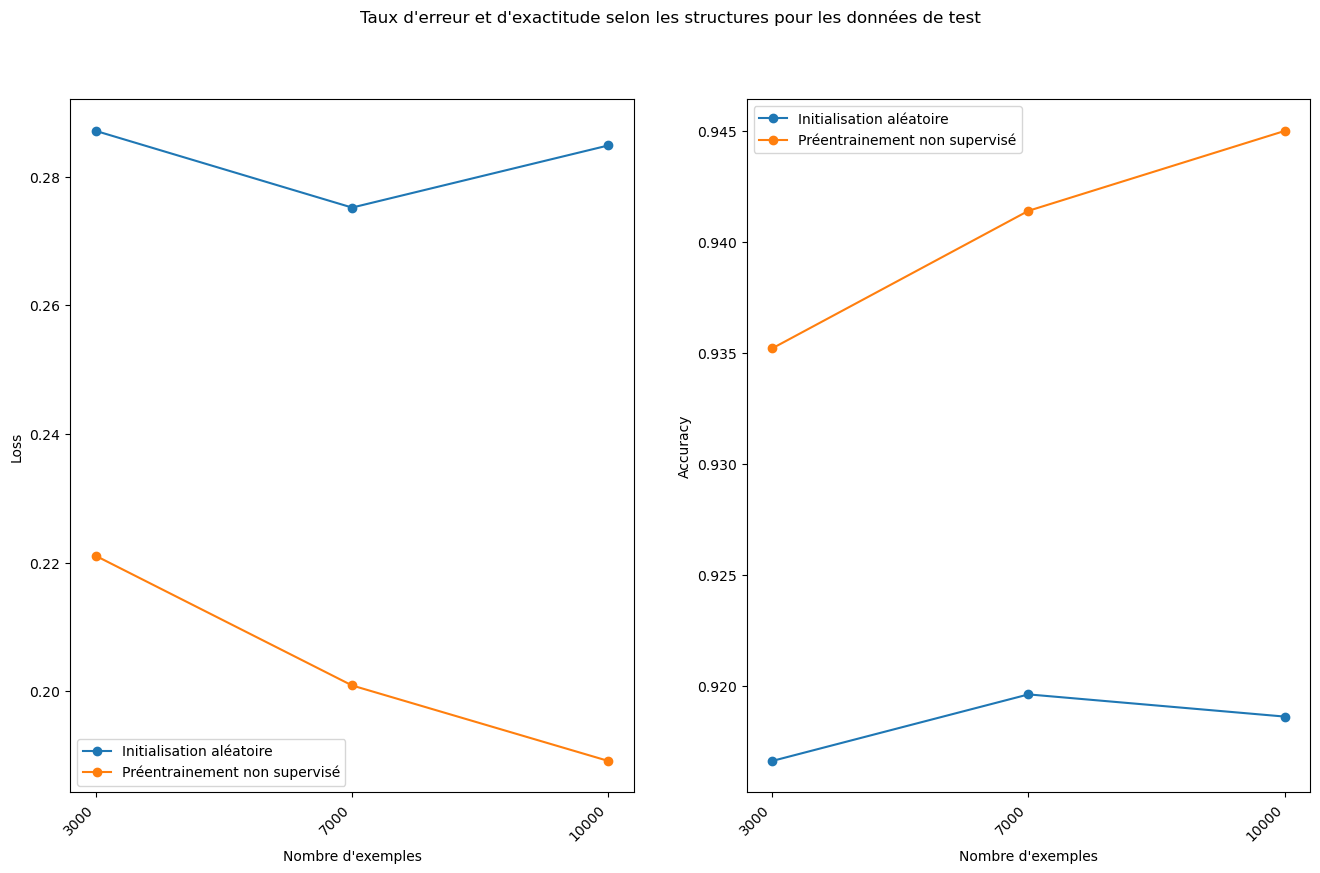

In [31]:
# Plot the result
X_range = range(len(number_of_examples))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de donnée d'apprentissage")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre d'exemples")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre d'exemples")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[1].legend()

plt.show()
